# Probability Density Functions

Date: 2020-10-01

In [1]:
library(ggplot2)

## Scenario

Let $X$ be a continuous random variable with p.d.f.

$$
f(x) = \begin{cases}
    &4x^{3} \hspace{3mm} &x \in (0, 1] \\
    &0 \hspace{3mm} &\text{otherwise}
\end{cases}
$$

-----

## Questions

**(a)** Is $f(x)$ a valid p.d.f.?

**(b)** Plot the p.d.f.

**(c)** Calculate $P(X \geq 0.5)$

**(d)** Calculate $P(X < 0.42)$

**(e)** Calculate $P(0.15 \leq X \leq 0.65)$

**(f)** Calculate the mean and variance of the pdf

-----

We first define a function that returns the value of $f(a)$, where $a \in (0,1)$.

In [2]:
pdf <- function(a) {4 * (a ** 3)}

### (a)

There are two properties for $f(x)$ to be a valid p.d.f.

1. $f(x) > 0$ for all $x$ in $X$
2. $\int f(x) = 1$ over the range of $X$

#### Property 1: $f(x) > 0$ 

Rather than using iteration, we will instead

1. Create a **DataFrame** with columns $x$ and $f(x)$
2. Filter the **DataFrame** for rows $f(x) \leq 0$
3. Check size of filtered **DataFrame** is 0

In [3]:
# declare an array
x <- seq(0, 1, length.out=1000000)

In [4]:
# create the df
df_pdf <- data.frame(x)

In [6]:
# add the pdf col
df_pdf$f <- pdf(x)

In [7]:
# filter for f(x) < 0
filtered_df <- subset(df_pdf, f < 0)

In [8]:
# number of filtered rows == 0?
nrow(filtered_df) == 0

[1] TRUE

#### Property 2: $\int f(x) = 1$

In [13]:
# does the pdf integrate to 1 over the range?
integrate(f = pdf, lower = 0, upper = 1)[1] == 1

value 
 TRUE

As both tests returned `TRUE`, we can confirm that $f(x)$ is a valid p.d.f.

### (b)

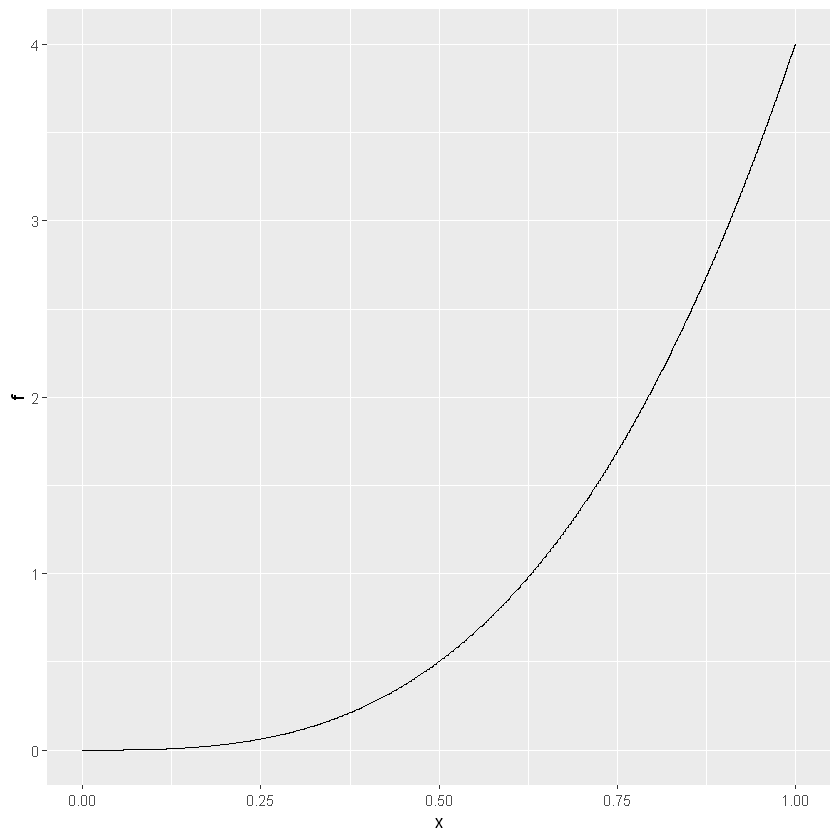

In [14]:
ggplot(data=df_pdf) +
  geom_line(mapping = aes(x=x, y=f))

### (c)

$$
P(X \leq 0.5) = P(X < 0.5) = \int_{0}^{0.5} 4 x^{3} \hspace{1mm} dx = ...
$$

In [33]:
integrate(f = pdf, lower = 0, upper = 0.5)[[1]]

[1] 0.0625

### (d)

$$
P(X > 0.42) \int_{0.42}^{1} 4 x^{3} \hspace{1mm} dx = ...
$$

In [31]:
integrate(f = pdf, lower = 0.42, upper = 1)[[1]]

[1] 0.968883

### (e)

$$
P(0.15 < X < 0.65) = \int_{0.15}^{0.65} 4 x^{3} \hspace{1mm} dx = ...
$$

In [32]:
integrate(f = pdf, lower = 0.15, upper = 0.65)[[1]]

[1] 0.178

### (f)

The mean and variance of a probability distribution function are

$$
\begin{aligned}
    &E(X) = \int_{L}^{U} x \> f(x) \> dx, \\
    &V(X) = E(X^{2}) - E(X)^{2} = \int_{L}^{U} x^{2} \> f(x) \> dx - E(X)^{2}
\end{aligned}
$$

We'll first define two function: `xfx` and `x2fx`

In [44]:
xfx <- function(a) {a * 4 * (a ** 3)}

In [48]:
x2fx <- function(a) {(a ** 2) * 4 * (a ** 3)}

Calculate $E(X)$

In [45]:
mean <- integrate(f = xfx, lower = 0, upper = 1)[[1]]

In [46]:
mean

[1] 0.8

Calculate $V(X)$

In [49]:
integrate(f = x2fx, lower = 0, upper = 1)[[1]] - (mean ** 2)

[1] 0.02666667